In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join('../src')))
from pyoma2.algorithms import FDD_MS, EFDD_MS, SSIcov_MS
from pyoma2.setup import MultiSetup_PreGER

In [5]:
# import data files
data1 = pd.read_csv("Setup1.txt", sep='\t').to_numpy()
data2 = pd.read_csv("Setup2.txt", sep='\t').to_numpy()

# list of datasets and reference indices
data = [data1, data2]
ref_idx = [0, 1, 2, 15, 16, 17, 21, 22, 23]
ref_ind = [ref_idx, ref_idx]

In [6]:
# Create multisetup
boveda = MultiSetup_PreGER(fs=250, ref_ind=ref_ind, datasets=data)

# Define geometry
boveda.def_geo1_by_file("Geo1_ms.xlsx")
boveda.def_geo2_by_file("Geo2_ms.xlsx")

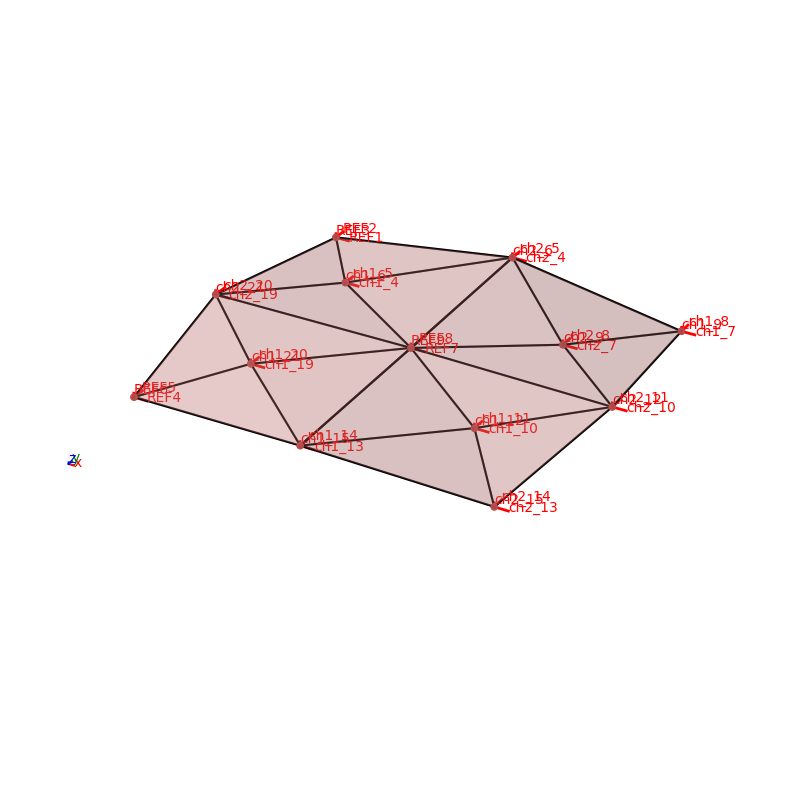

In [7]:
#_, _ = frame_4P.plot_geo1(scaleF=0.1)
_, _ = boveda.plot_geo2_mpl(scaleF=0.1)

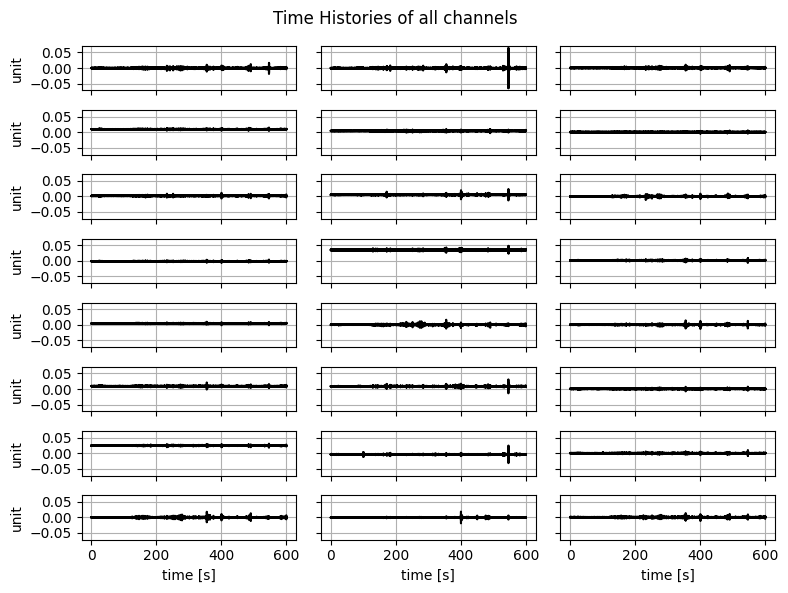

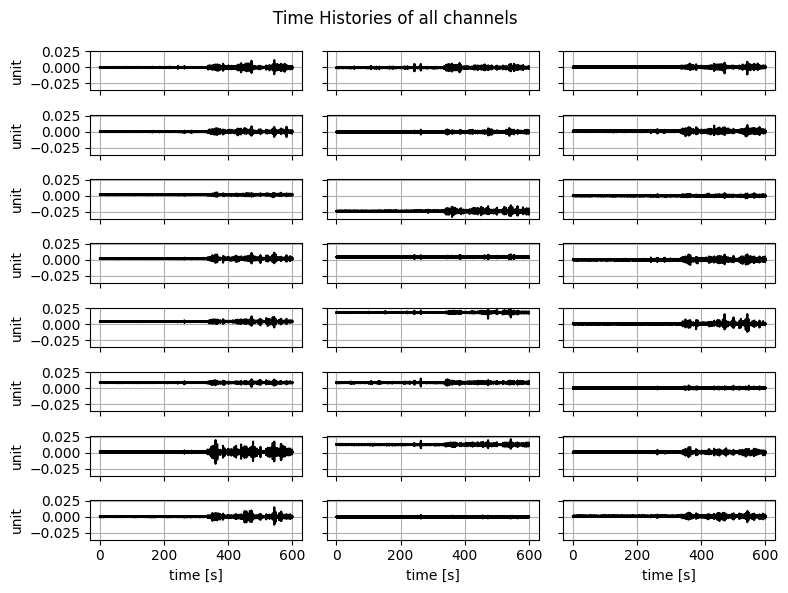

In [8]:
_, _ = boveda.plot_data(nc=3)

In [9]:
boveda.filter_data(Wn=(0.1, 25), order=8, btype="bandpass")
boveda.decimate_data(q=5)
#_, _ = frame_4P.plot_ch_info(ch_idx=[0])

In [10]:
# Initialise the algorithms
ssicov = SSIcov_MS(name="SSIcov", br=80, ordmax=80, calc_unc=True)

# Add algorithms to the class
boveda.add_algorithms(ssicov)
boveda.run_all()

2025-03-21 11:48:12,939 - pyoma2.setup.base - INFO - Running SSIcov... (base:123)
100%|██████████| 81/81 [00:00<00:00, 11479.60it/s]
2025-03-21 11:48:15,632 - pyoma2.functions.ssi - INFO - Calculating modal parameters for increasing model order... (ssi:486)
100%|██████████| 81/81 [00:00<00:00, 99.98it/s] 
2025-03-21 11:48:17,120 - pyoma2.setup.base - INFO - all done (base:102)


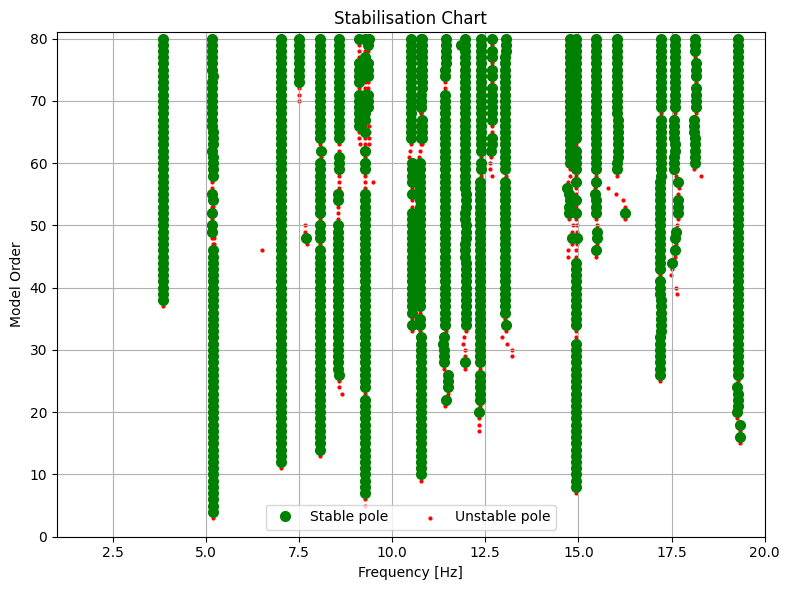

In [11]:
# Plot
_, _ = ssicov.plot_stab(freqlim=(1,20), hide_poles=False)

After the algorithms have been executed we can exctract the desired poles and plot the mode shapes.

2025-03-21 11:48:31,330 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIcov (base:149)
2025-03-21 11:48:31,331 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:889)
100%|██████████| 3/3 [00:00<00:00, 3007.39it/s]


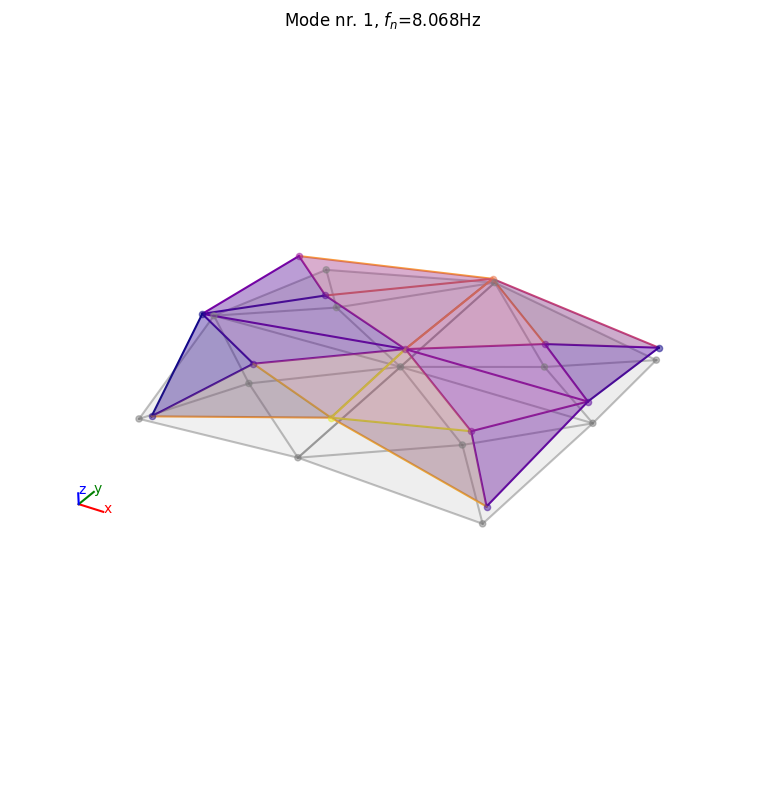

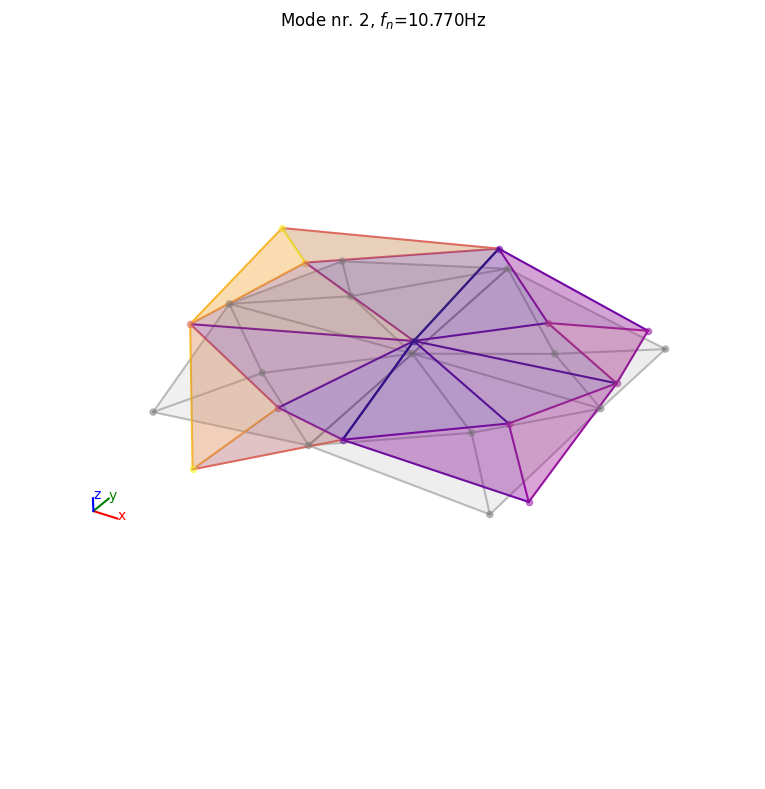

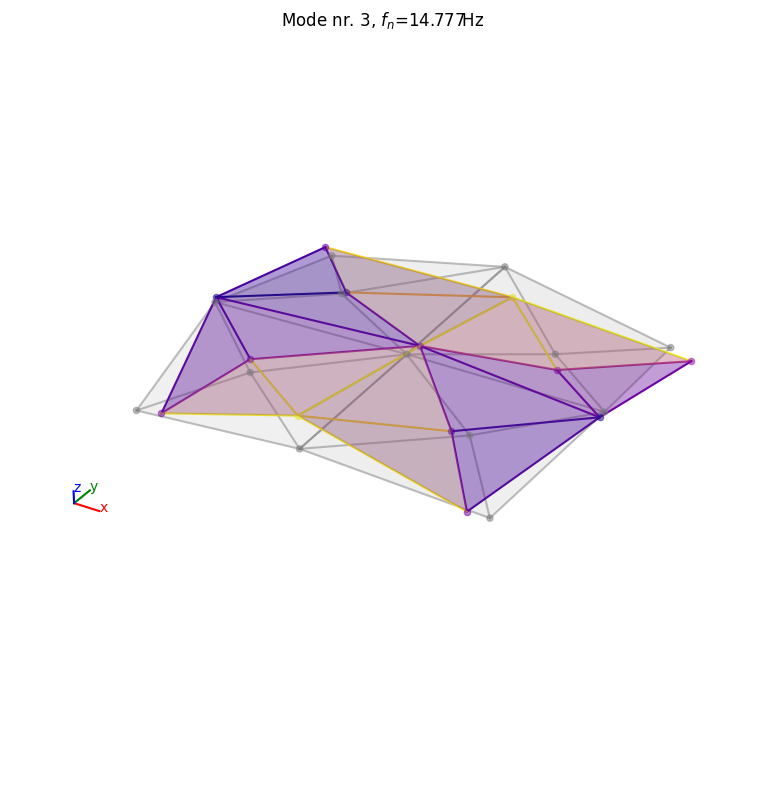

In [12]:
# get modal parameters
boveda.mpe("SSIcov", sel_freq=[8.0, 10.69, 14.32], order_in=80)

# plot mode shapes
_ = boveda.plot_mode_geo2_mpl(algo_res=ssicov.result, mode_nr=1, scaleF=0.5, notebook=True)
_ = boveda.plot_mode_geo2_mpl(algo_res=ssicov.result, mode_nr=2, scaleF=0.5, notebook=True)
_ = boveda.plot_mode_geo2_mpl(algo_res=ssicov.result, mode_nr=3, scaleF=0.5, notebook=True)

In [13]:
ssicov.result.Fn

array([ 8.06786053, 10.77004349, 14.77671353])